<a href="https://colab.research.google.com/github/Susena-V/AI-ML-Coding-Club/blob/main/Barabasi_Albert_Model_Generating_a_Scale_Free_Network_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A) Generate BA Network:
1. Implement the BA Algorithm to generate the scale-free network S over 10000 nodes. Assume
there are 100 nodes in the initialization phase for BA and adhering to the characteristics laid
by the BA Model (deg of each node >=1). State clearly what are the initialisation steps in the
report.
2. Find the Giant component for S and compare the Giant component size with the two networks
that you had taken in the Round 1. Compare and contrast the basic statistics of the networks
(mean degree, degree distribution, average local clustering coefficient, global clustering
coefficient).
3. Do all the centrality measure studies conducted for Project Round 1 for the net

In [2]:
import numpy as np
import networkx as nx

In [4]:
N = 10000
m0 = 100
m = 80 # edges added per new node - mention in the report

G = nx.complete_graph(m0)

for new_node in range(m0, N):
  degrees = [G.degree(node) for node in G.nodes()]

  total_degree = sum(degrees)
  probabilities = [degree/total_degree for degree in degrees]

  targets = np.random.choice(G.nodes(), size = m, replace = False, p = probabilities)

  for target in targets:
    G.add_edge(new_node, target)

ba_network = G

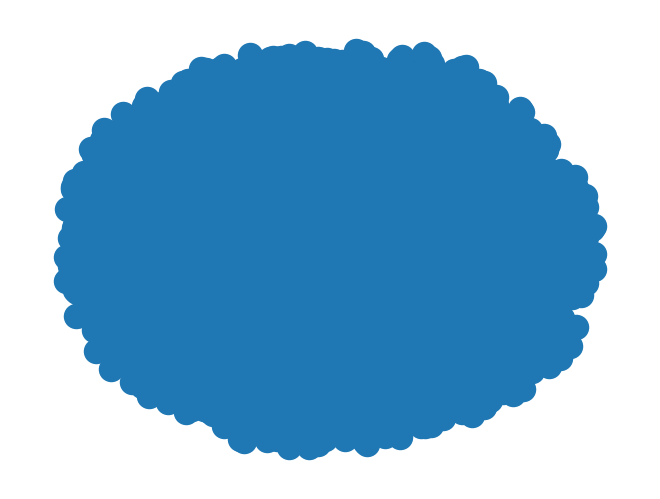

In [6]:
nx.draw(ba_network)

In [7]:
with open('S.txt', 'w') as f:
  for u,v in ba_network.edges():
    f.write(f'{u},{v}')

EVERY NEW NODE ADDS 80 EDGES - THIS SHOULD GO IN THE INITIALIZATION REPORT

## Identifying the Giant Component

In [9]:
components = nx.connected_components(ba_network)
giant_component = max(components, key = len)

In [11]:
print(f'GIANT COMPONENT {len(giant_component)}')

GIANT COMPONENT 10000


basic statistics of the networks
(mean degree, degree distribution, average local clustering coefficient, global clustering
coefficient).

In [12]:
mean_degree = 2*len(ba_network.edges())/len(ba_network.nodes())
print(f"Mean Degree: {mean_degree}")

Mean Degree: 159.39


In [13]:
from collections import defaultdict

In [14]:
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in ba_network.degree()], reverse = True)
degree_counts = defaultdict(int)

for degree in degree_sequence:
  degree_counts[degree]+=1

degrees = list(degree_counts.keys())
frequencies = list(degree_counts.values())


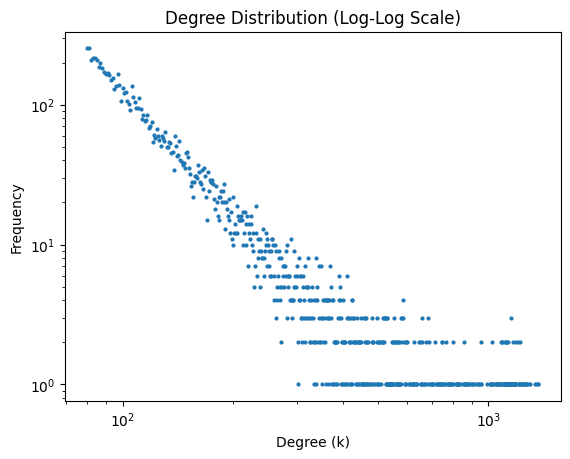

In [15]:
plt.loglog(degrees, frequencies, 'o', markersize=2)
plt.xlabel("Degree (k)")
plt.ylabel("Frequency")
plt.title("Degree Distribution (Log-Log Scale)")
plt.show()

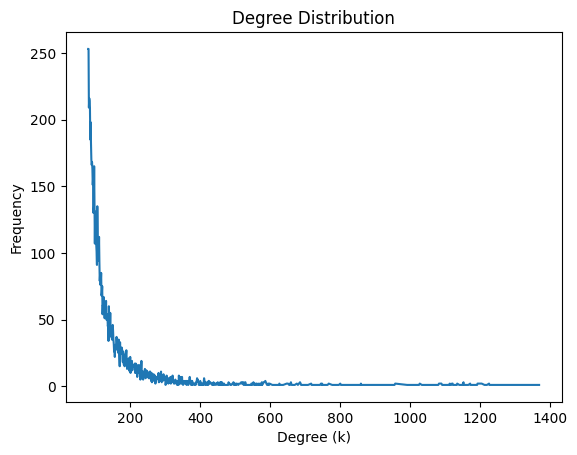

In [18]:
plt.plot(degrees, frequencies)
plt.xlabel("Degree (k)")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

In [19]:
# Compute the average local clustering coefficient
avg_local_clustering = nx.average_clustering(ba_network)
print(f"Average Local Clustering Coefficient: {avg_local_clustering}")

Average Local Clustering Coefficient: 0.0538931972175611


In [20]:
# Compute the global clustering coefficient
global_clustering = nx.transitivity(ba_network)
print(f"Global Clustering Coefficient: {global_clustering}")

Global Clustering Coefficient: 0.0553766761245931
